     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


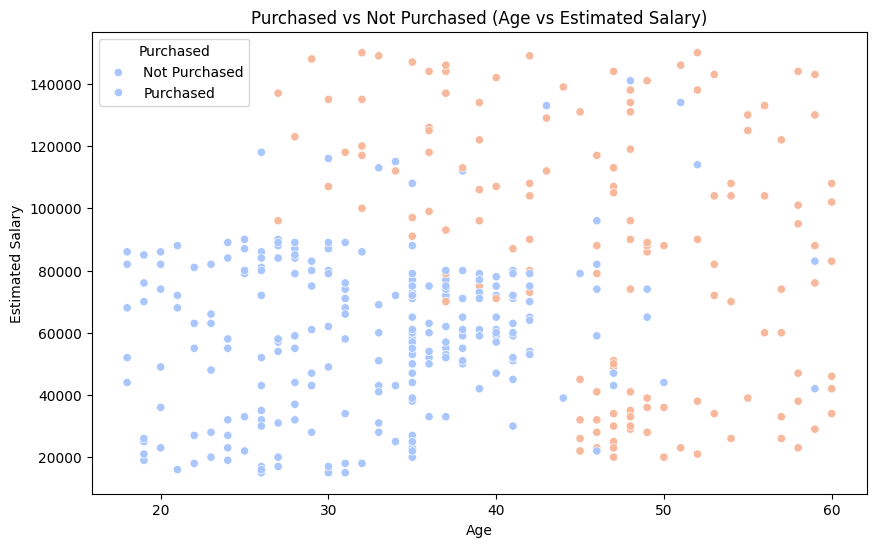

k = 3: Train Accuracy = 0.9219, Test Accuracy = 0.9125
k = 5: Train Accuracy = 0.9094, Test Accuracy = 0.9250
k = 7: Train Accuracy = 0.9187, Test Accuracy = 0.9375


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


Mobile=pd.read_csv('mobile.csv')
print(Mobile)


Mobile.head()
Mobile.info()
Mobile.describe()
Mobile.isnull().sum()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=Mobile['Age'], y=Mobile['EstimatedSalary'], hue=Mobile['Purchased'], palette='coolwarm')
plt.title('Purchased vs Not Purchased (Age vs Estimated Salary)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased', labels=['Not Purchased', 'Purchased'])
plt.show()


scaler = MinMaxScaler()
Mobile[['Age', 'EstimatedSalary']] = scaler.fit_transform(Mobile[['Age', 'EstimatedSalary']])


X = Mobile[['Age', 'EstimatedSalary']]
y = Mobile['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


def train_knn(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f'k = {k}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}')
for k in [3, 5, 7]:
    train_knn(k)